In [26]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [27]:
df=pd.read_csv('C:\\Users\\86746\\Desktop\\NYU\\Varun\\bus.csv',encoding='ISO-8859-1')

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
date=df['Occurred_On'].tolist()
for i in range(0,len(date)-1):
    if date[i][-2] == "AM" and date[i][11:13] == "12":
        date[i]= "00" + date[i][13:-2]
    elif date[i][-2:] == "AM":
        date[i]=date[i][:-2]
    elif date[i][-2:] == "PM" and date[i][11:13] == "12":
        date[i]=date[i][:-2]
    else:
        hour=str(int(date[i][11:13])+12) + date[i][13:-3]
        date[i]=date[i][0:11]+hour

In [29]:
df['Occurred_On']=date

In [30]:
df.dropna(subset=['Boro','Reason'],inplace=True)
df['Occurred_On']=pd.to_datetime(df['Occurred_On'])
df=df[df['Boro']!='All Boroughs']
df['day']=df['Occurred_On'].dt.dayofweek
df['year']=df['Occurred_On'].dt.year
df['hour']=df['Occurred_On'].dt.hour
df=df[df['day']!=6]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451778 entries, 0 to 463993
Data columns (total 24 columns):
School_Year                        451778 non-null object
Busbreakdown_ID                    451778 non-null int64
Run_Type                           451775 non-null object
Bus_No                             451766 non-null object
Route_Number                       451771 non-null object
Reason                             451778 non-null object
Schools_Serviced                   451771 non-null object
Occurred_On                        451778 non-null datetime64[ns]
Created_On                         451778 non-null object
Boro                               451778 non-null object
Bus_Company_Name                   451778 non-null object
How_Long_Delayed                   402900 non-null object
Number_Of_Students_On_The_Bus      451778 non-null int64
Has_Contractor_Notified_Schools    451778 non-null object
Has_Contractor_Notified_Parents    451778 non-null object
Have_You_Aler

In [32]:
df['Bus_No'].value_counts()

1801      941
1470      799
1318      790
1107      766
9302      762
         ... 
LK1610      1
5699        1
25538       1
42164       1
26881       1
Name: Bus_No, Length: 15860, dtype: int64

In [33]:
df['Route_Number'].value_counts()

1         4881
2         3786
3         3015
5         2959
4         1771
          ... 
R9318        1
B0212Z       1
R294         1
VN5          1
M9489        1
Name: Route_Number, Length: 16145, dtype: int64

In [34]:
count_day = df[['day', 'Breakdown_or_Running_Late']].groupby(by='day', as_index=True).count()
count_year = df[['year', 'Breakdown_or_Running_Late']].groupby(by='year', as_index=True).count()

In [35]:
count_day.rename(columns={'Breakdown_or_Running_Late':'N_trips'}, inplace=True)

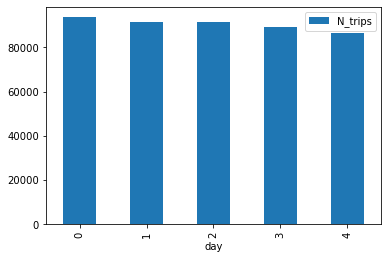

In [36]:
count_day.plot.bar()

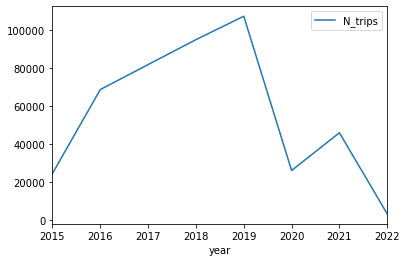

In [37]:
count_year.rename(columns={'Breakdown_or_Running_Late':'N_trips'}, inplace=True)
count_year.plot()

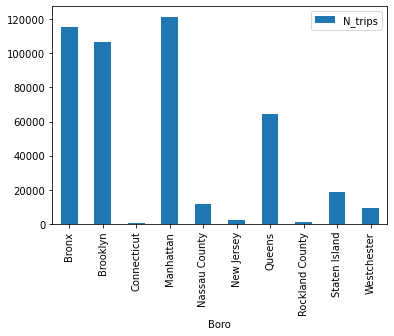

In [38]:
count_boro=df[['Boro', 'Breakdown_or_Running_Late']].groupby(by='Boro', as_index=True).count()
count_boro.rename(columns={'Breakdown_or_Running_Late':'N_trips'}, inplace=True)
count_boro.plot.bar()

In [39]:
df['hour'].unique()

array([ 8,  7, 20,  9, 11, 23, 12, 13, 14,  2, 16, 17, 18,  5,  6, 19, 15,
        1, 10, 22,  3,  4, 21], dtype=int64)

In [40]:
hour=df['hour'].tolist()

In [41]:
for i in range(0,len(hour)):
    if hour[i]==23:
        hour[i]=11
    elif hour[i]==22:
        hour[i]=10
    elif hour[i]==21:
        hour[i]=9
    elif hour[i]==1:
        hour[i]=13
    elif hour[i]==2:
        hour[i]=14
    elif hour[i]==3:
        hour[i]=15
    elif hour[i]==4:
        hour[i]=16
    elif hour[i]==5:
        hour[i]=17
    else:
        hour[i]=hour[i]

In [42]:
df['hour']=hour

New Jersey


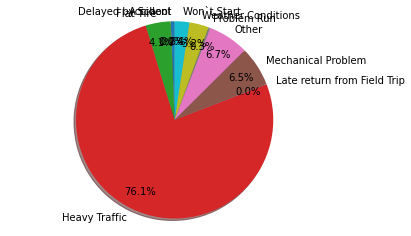

Manhattan


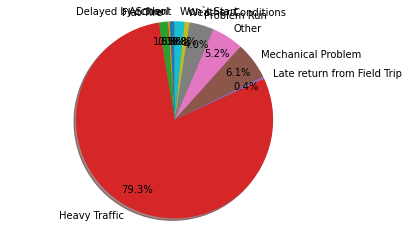

Bronx


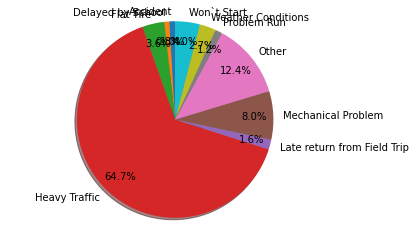

Westchester


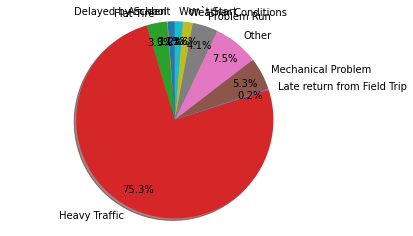

Brooklyn


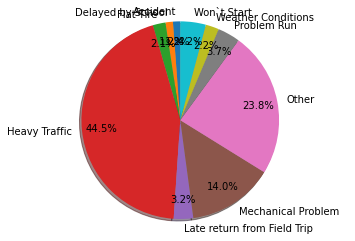

Rockland County


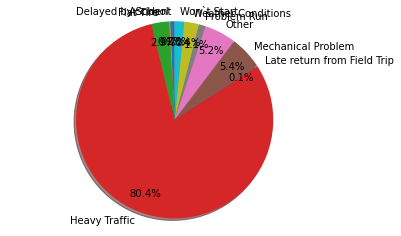

Nassau County


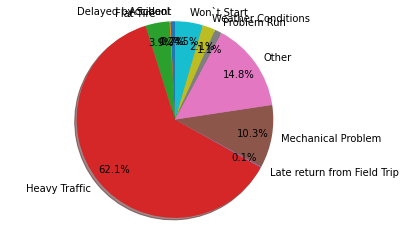

Queens


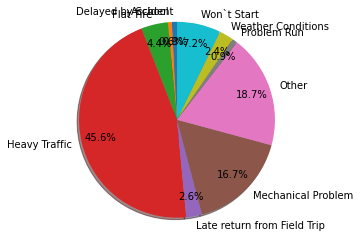

Staten Island


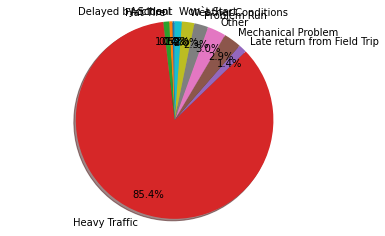

Connecticut


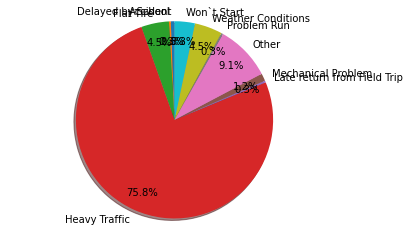

In [43]:
for i in df['Boro'].unique():
    bus=df[df['Boro']==i]
    reason = bus[['Reason', 'Breakdown_or_Running_Late']].groupby(by='Reason', as_index=False).count()
    labels = reason['Reason']
    sum1=reason.sum()
    explode=np.zeros(len(labels))
    sizes=[]
    for j in range(0,10):
        count=reason['Breakdown_or_Running_Late'][j]/sum1[1]
        sizes.append(count)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',pctdistance=0.8,
    shadow=True, startangle=90)
    ax1.axis('equal') 
    print(i)
    plt.show()

In [44]:
for i in df['Boro'].unique():
    bus=df[df['Boro']==i]
    reason = bus[['Reason', 'Breakdown_or_Running_Late']].groupby(by='Reason', as_index=False).count()
    reason.rename(columns={'Breakdown_or_Running_Late':'N_trips'}, inplace=True)
    reason=reason.sort_values('N_trips',ascending=False)
    print(i)
    print(reason)

New Jersey
                        Reason  N_trips
3                Heavy Traffic     1813
6                        Other      159
5           Mechanical Problem      155
2                    Flat Tire       97
8           Weather Conditions       76
9                  Won`t Start       57
0                     Accident       15
7                  Problem Run        7
1            Delayed by School        1
4  Late return from Field Trip        1
Manhattan
                        Reason  N_trips
3                Heavy Traffic    96284
5           Mechanical Problem     7401
6                        Other     6336
7                  Problem Run     4881
9                  Won`t Start     1959
2                    Flat Tire     1804
8           Weather Conditions      989
0                     Accident      970
4  Late return from Field Trip      442
1            Delayed by School      344
Bronx
                        Reason  N_trips
3                Heavy Traffic    74677
6            

<BarContainer object of 75 artists>

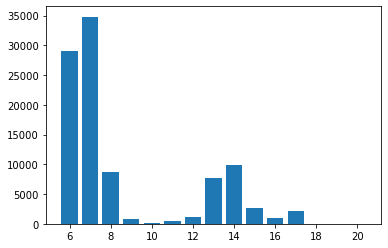

In [45]:
bus_hour = df[['hour','day','Breakdown_or_Running_Late']].groupby(['hour','day'],as_index = False).count()
bus_hour.rename(columns={'Breakdown_or_Running_Late':'N_trips'}, inplace=True)
plt.bar(bus_hour.hour,bus_hour.N_trips)

In [36]:
import seaborn as sns
from scipy.stats import norm #normal
from scipy.stats import genextreme as gev #generalized extreme value
from scipy.stats import pareto #pareto
def distribution_analysis(x, log_scale = False, fit_distribution = 'None', bins = 50, vis_means = True, vis_curve = True, print_outputs = True):
    #x - array of observations
    #log_scale - analyze distribution of log(x) if True
    #fit_distribution - fit the distribution ('normal', 'gev' or 'pareto') or do nothing if 'None'
    #bins - how many bins to use for binning the data
    #vis_means - show mean and std lines if True
    #vis_curve - show interpolated distribution curve over the histogram bars if True
    #print_outputs - print mean, std and percentiles
    
    if log_scale: 
        x1 = np.log10(x) #convert data to decimal logarithms
        xlabel = 'log(values)' #reflect in x labels
    else:
        x1 = x #leave original scale 
        xlabel = 'values'
    mu = x1.mean() #compute the mean
    if log_scale: #if logscale, output all three - log mean, its original scale and original scale mean
        print('Log mean = {:.2f}({:.2f}), mean = {:.2f}'.format(mu,10**mu,x.mean()))
    else:
        print('Mean = {:.2f}'.format(mu)) #otherwise print mean
    sigma = x1.std() #compute and output standard deviation 
    print('Standard deviation = {:.2f}'.format(sigma))
    for p in [1,5,25,50,75,95,99]: #output percentile values
        print('{:d} percentile = {:.2f}'.format(p,np.percentile(x,p)))
        
    #visualize histogram and the interpolated line (if vis_curve=True) using seaborn
    sns.distplot(x1, hist=True, kde=vis_curve, 
        bins=bins,color = 'darkblue', 
        hist_kws={'edgecolor':'black'},
        kde_kws={'linewidth': 4})
    
    #show vertical lines for mean and std if vis_means = True
    if vis_means:
        plt.axvline(mu, color='r', ls='--', lw=2.0)
        plt.axvline(mu-sigma, color='g', ls='--', lw=2.0)
        plt.axvline(mu+sigma, color='g', ls='--', lw=2.0)
        
    ylim = plt.gca().get_ylim() #keep the y-range of original distribution density values 
    #(to make sure the fitted distribution would not affect it)
    
    h = np.arange(mu - 3 * sigma, mu + 3 * sigma, sigma / 100) #3-sigma visualization range for the fitted distribution
    pars = None #fitted distribution parameters
    
    #fit and visualize the theoretic distribution
    if fit_distribution == 'normal':
        pars = norm.fit(x1)
        plt.plot(h,norm.pdf(h,*pars),'r')
    elif fit_distribution == 'gev':
        pars = gev.fit(x1)
        plt.plot(h,gev.pdf(h,*pars),'r')
    elif fit_distribution == 'pareto':
        pars = pareto.fit(x1)
        plt.plot(h,pareto.pdf(h,*pars),'r')
    
    plt.xlabel(xlabel) #add x label 
    plt.ylim(ylim) #restore the y-range of original distribution density values 
    plt.show()
    return pars

Mean = 4302.65
Standard deviation = 8709.08
1 percentile = 2.04
5 percentile = 3.20
25 percentile = 72.00
50 percentile = 322.00
75 percentile = 2464.00
95 percentile = 28723.80
99 percentile = 33213.24


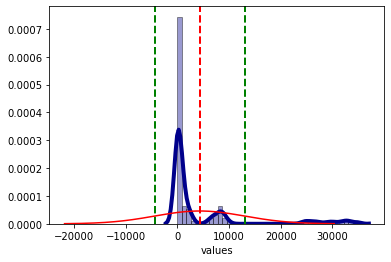

In [37]:
distribution_analysis(bus_hour['N_trips'], fit_distribution='normal', bins=40);

In [46]:
result=[]
for i in range(0,5):
    for j in range(0,5):
        count=bus_hour[bus_hour['day']==i]
        count_rest=bus_hour[bus_hour['day']==j]
        if i==j:
            p='-'
            result.append(p)
        else:
            test=stats.ttest_ind(count['N_trips'],count_rest['N_trips'])
            if test[1]<0.05:
                p=True
            else:
                p=False
            result.append(p)


In [47]:
weekday=['Mon','Tue','Wed','Thr','Fri']
data={'Mon':result[0:5],'Tue':result[5:10],'Wed':result[10:15],'Thr':result[15:20],'Fri':result[20:25]}
ttest_result=pd.DataFrame(data,index=weekday)
ttest_result

,Mon,Tue,Wed,Thr,Fri
Mon,-,False,False,False,False
Tue,False,-,False,False,False
Wed,False,False,-,False,False
Thr,False,False,False,-,False
Fri,False,False,False,False,-


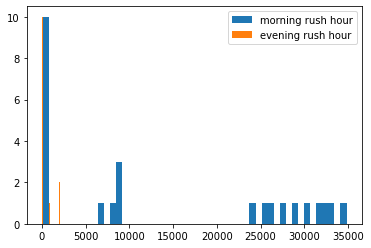

In [48]:
plt.hist(bus_hour[(bus_hour['hour']>=6)&(bus_hour['hour']<=10)]['N_trips'].values,bins=50,label='morning rush hour')
plt.hist(bus_hour[(bus_hour['hour']>=16)&(bus_hour['hour']<=19)]['N_trips'].values,bins=50,label='evening rush hour')
plt.legend()

In [49]:
test=stats.ttest_ind(bus_hour[(bus_hour['hour']>=6)&(bus_hour['hour']<=10)]['N_trips'],bus_hour[(bus_hour['hour']>=16)&(bus_hour['hour']<=19)]['N_trips'])

In [50]:
test[1]<0.05

True

In [25]:
df['Number']=df['Breakdown_or_Running_Late']

In [26]:
Man=df[df['Boro']=='Manhattan']
Bronx=df[df['Boro']=='Bronx']
Bk=df[df['Boro']=='Brooklyn']

In [27]:
Man_hour = Man[['hour','day','Number']].groupby(['hour','day'],as_index = False).count()
Bronx_hour = Bronx[['hour','day','Number']].groupby(['hour','day'],as_index = False).count()
Bk_hour = Bk[['hour','day','Number']].groupby(['hour','day'],as_index = False).count()

<BarContainer object of 97 artists>

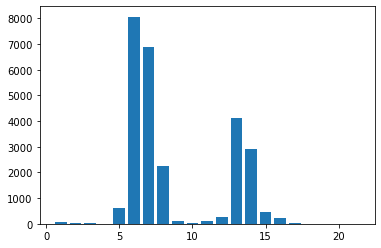

In [28]:
plt.bar(Man_hour.hour,Man_hour.Number)

Mean = 3240.40
Standard deviation = 3293.81
1 percentile = 14.72
5 percentile = 17.60
25 percentile = 73.00
50 percentile = 2061.00
75 percentile = 6494.00
95 percentile = 8004.60
99 percentile = 8060.76


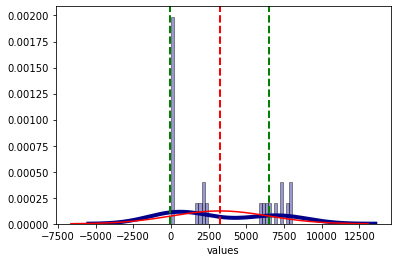

In [39]:
distribution_analysis(Man_hour[(Man_hour['hour']>=6)&(Man_hour['hour']<=10)]['Number'], fit_distribution='normal', bins=40);

In [29]:
result_Man=[]
for i in range(0,5):
    for j in range(0,5):
        count=Man_hour[Man_hour['day']==i]
        count_rest=Man_hour[Man_hour['day']==j]
        if i==j:
            
            p='-'
            result_Man.append(p)
        else:
            test=stats.ttest_ind(count['Number'],count_rest['Number'])
            
            if test[1]<0.05:
                p=True
            else:
                p=False
            result_Man.append(p)
weekday=['Mon','Tue','Wed','Thr','Fri']
data={'Mon':result_Man[0:5],'Tue':result_Man[5:10],'Wed':result_Man[10:15],'Thr':result_Man[15:20],'Fri':result_Man[20:25]}
ttest_result=pd.DataFrame(data,index=weekday)
ttest_result

,Mon,Tue,Wed,Thr,Fri
Mon,-,False,False,False,False
Tue,False,-,False,False,False
Wed,False,False,-,False,False
Thr,False,False,False,-,False
Fri,False,False,False,False,-


<BarContainer object of 102 artists>

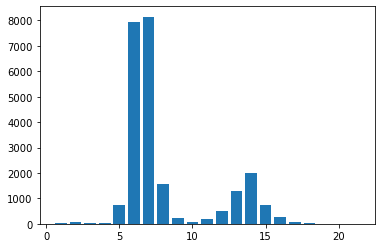

In [30]:
plt.bar(Bk_hour.hour,Bk_hour.Number)